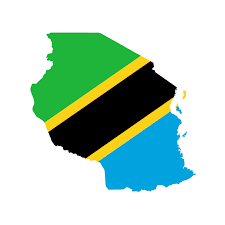

 ## <font color ='BLUE'> Accurate Predict Tourist Expenditure When Visting Tanzania </font>

 ### <font color='brown'>by James Gikunju Kibugu </font>

### <font color = blue /> OBJECTIVE OF THE STUDY:

The objective of this hackathon is to develop a machine learning model to predict what a tourist will spend when visiting Tanzania.The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania..


### <font color = blue />  1. EXPLORATORY DATA ANALYSIS:

The objective of exploratory data analysis is to try and achieve the following way in understanding the data and try to get insight from it. EDA refers to the critical process in investigation on data so as to help us get the summary statistics and graphical representations.




#### 1.1 INGEST THE DATA.

In [1]:
# import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings                                 # Suppress warnings 
warnings.filterwarnings('ignore')
import os                                       # File system manangement
import gc                                       # memory management
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# load a dataset.
df_train=pd.read_csv("Train.csv")
df_test=pd.read_csv("Test.csv")
df_sub=pd.read_csv("SampleSubmission.csv")
descp=pd.read_csv("VariableDefinitions.csv")

In [6]:
descp

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [7]:
# Data Dimension
# The no of columns and rows in the data
print('Training data: {} Rows, {} Columns'.format(*df_train.shape))
print('Testing  data: {} Rows, {} Columns'.format(*df_test.shape))

Training data: 4809 Rows, 23 Columns
Testing  data: 1601 Rows, 22 Columns


In [9]:
# Print First Few Rows Of The Data
display("Train data :")
display(df_train.head(3))
display("Test data :")
display(df_test.head(3))

'Train data :'

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0


'Test data :'

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments


In [10]:
# The columns and their names.
df_train.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [11]:
# Different columns and their data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
ID                       4809 non-null object
country                  4809 non-null object
age_group                4809 non-null object
travel_with              3695 non-null object
total_female             4806 non-null float64
total_male               4804 non-null float64
purpose                  4809 non-null object
main_activity            4809 non-null object
info_source              4809 non-null object
tour_arrangement         4809 non-null object
package_transport_int    4809 non-null object
package_accomodation     4809 non-null object
package_food             4809 non-null object
package_transport_tz     4809 non-null object
package_sightseeing      4809 non-null object
package_guided_tour      4809 non-null object
package_insurance        4809 non-null object
night_mainland           4809 non-null float64
night_zanzibar           4809 non-null float64
payment_mode   

In [12]:
# This gives the descriptive statistics for the data 
df_train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [13]:
df_train.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

- On the missing Values on the total female and male we will use average
- The most impressive and travel with we will use 'none'

##### We try to understand a no of thing about the tourist.
1. age
2. gender, 
3. travel with, 
4. purpose of visit, 
5. Main activities that they come to do, 
6. country they belong, 
7. what impressed them the most
8. How did i learn about Tanzania ( info Source)

##### 1.1 The distribution based the age group:

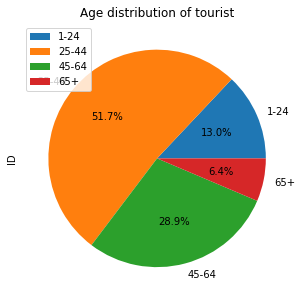

In [14]:

df_train.groupby('age_group')['ID'].count().plot.pie(figsize=(5,5),
                                               title = "Age distribution of tourist",
                                               legend = True,
                                               autopct='%.1f%%');

Most of the tourist who came to Tanzania based on the age group are as follows.
The highest no of tourist is the age group between 24-45 years with 52% and also age group between 45 to 64 years also with 29% so the 2 group contributing 81% of all the tourists.
The rest contributing less than 20% of all the tourists

##### 1.2 The distribution based on gender.

In [15]:
df_male=df_train['total_male'].sum()
df_female=df_train['total_female'].sum()
gender={'gender':[df_male,df_female]}
df_gender=pd.DataFrame(data=gender)

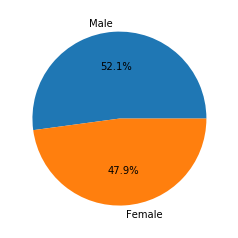

In [16]:
labels=('Male','Female')
gender = df_gender["gender"]
# Plot with labels and percentage
plt.pie(gender,autopct='%1.1f%%',labels=labels)
plt.title = 'The gender distribution of Tourist',
plt.show()

Based on the above most of the tourist that visited Tanzania were male at 52.4% and female at 47.6%

##### 1.3  The tourist based on who they travelled  with.

In [17]:
df_train['travel_with'].unique()

array(['Friends/Relatives', nan, 'Alone', 'Spouse', 'Children',
       'Spouse and Children'], dtype=object)

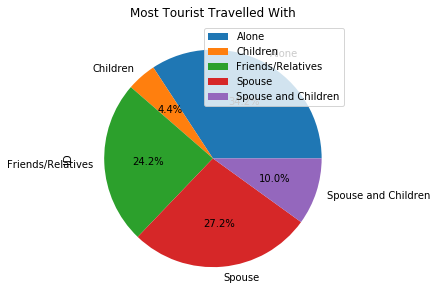

In [18]:
df_train.groupby('travel_with')['ID'].count().plot.pie(figsize=(5,5),
                                         title= "Most Tourist Travelled With",
                                         autopct='%1.1f%%',
                                         legend = True);
                                    

Most of the people travelled alone contributing 26 % of all the tourist, spouse contributing 21.4%, friends and relatives 19.1%,families ie spouse and children at 7.6% and children 3.4% 

##### 1.4  The purpose of the visit.


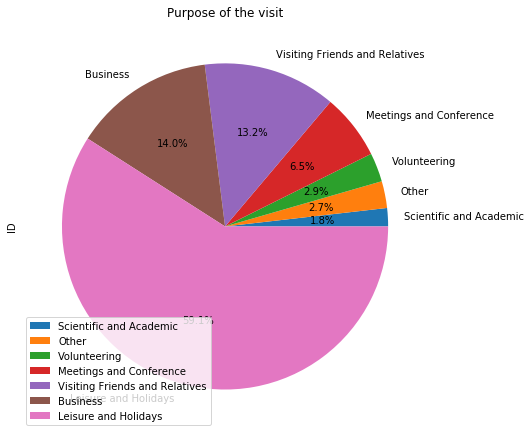

In [19]:
df_train.groupby('purpose')['ID'].count().sort_values(ascending = True).plot.pie(figsize=(7.5,7.5),
        title= "Purpose of the visit",
        autopct='%1.1f%%',
        legend = True);

This would answer the question of why do they choose Tanzania to other country.Hence improve those places and more conservation is needed to attract more tourists. Majority of the tourist  come for leisure contributing 58.8%, Business 14.2% and visiting friends and relatives at 13% so those are the major reasons which in general contributes 86% of the reasons.

##### 1.5  Main activities that they come to do, 

In [20]:
df_train.groupby('main_activity')['ID'].count().sort_values(ascending= False)

main_activity
Wildlife tourism            2259
Beach tourism               1025
Hunting tourism              457
Conference tourism           367
Cultural tourism             359
Mountain climbing            234
business                      58
Bird watching                 37
Diving and Sport Fishing      13
Name: ID, dtype: int64

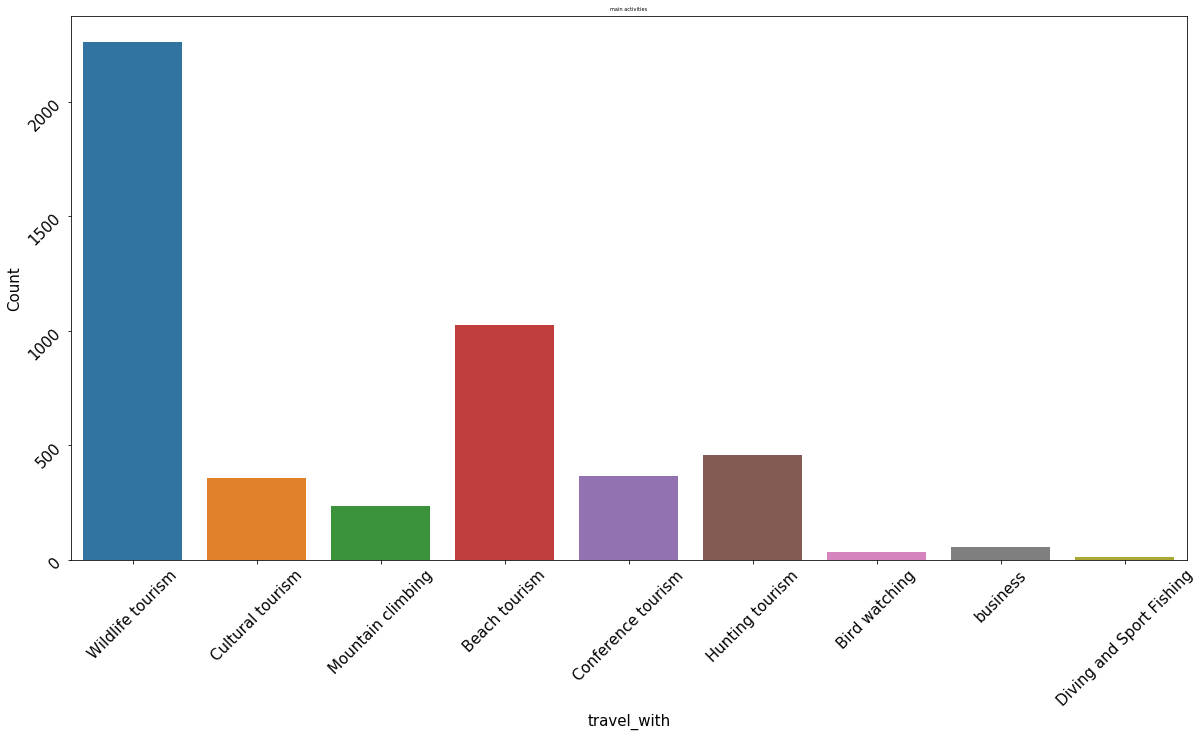

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x = 'main_activity', data = df_train)
ax.set_xlabel('travel_with', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('main activities', fontsize=5)
ax.tick_params(labelsize=15,rotation =45)

##### 1.6. country they belong, 

In [22]:
df_country=df_train.groupby('country')['ID'].count().sort_values(ascending=False)

In [23]:
df_country.head(10)

country
UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
KENYA                       235
SOUTH AFRICA                235
GERMANY                     223
ZAMBIA                      191
AUSTRALIA                   186
Name: ID, dtype: int64

Since the above data has alot of country most of the visitors were from USA and UK then 3 africa countries that is zimbabwe, south africa and kenya then Europe countries France, Germany and Australia.

##### 1.7  what impressed them the most.

In [24]:
df_train.groupby('most_impressing')['ID'].count().sort_values(ascending=False)

most_impressing
Friendly People                         1541
 Wildlife                               1038
No comments                              743
Wonderful Country, Landscape, Nature     507
Good service                             365
Excellent Experience                     271
Satisfies and Hope Come Back              31
Name: ID, dtype: int64

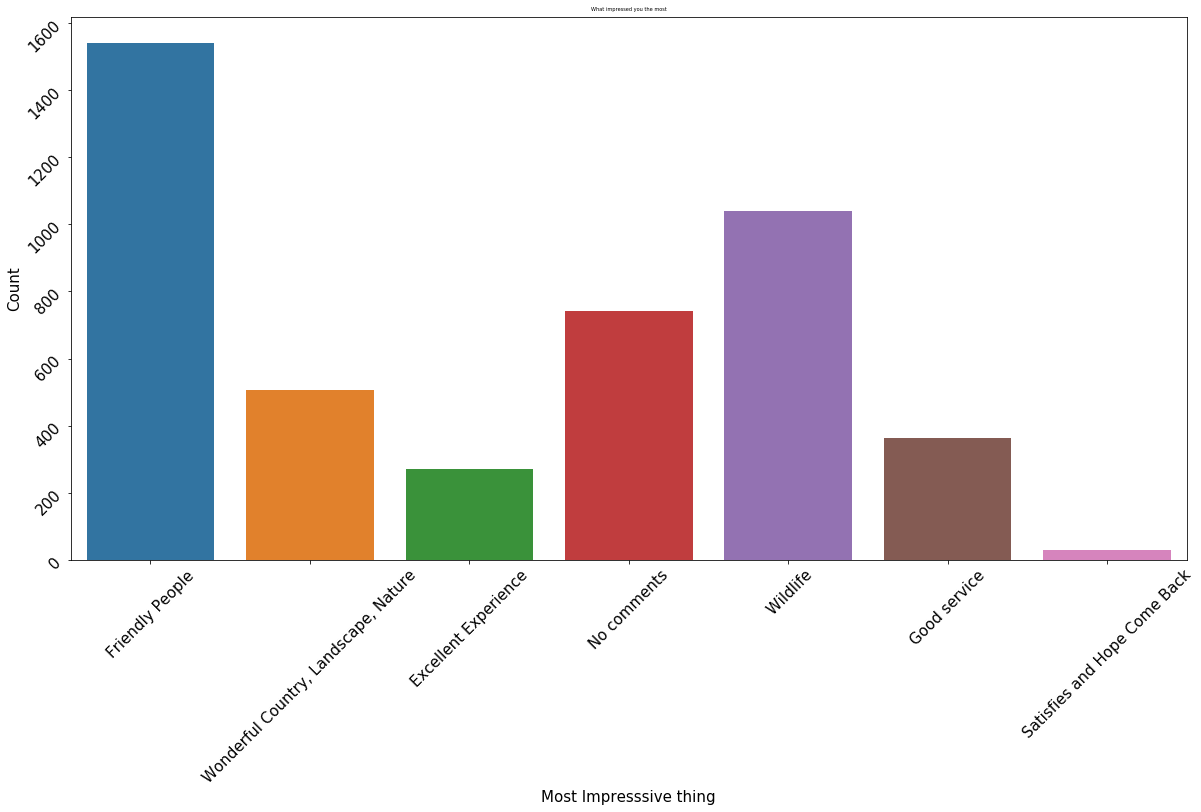

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot('most_impressing',data = df_train)
ax.set_xlabel('Most Impresssive thing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('What impressed you the most', fontsize=5)
ax.tick_params(labelsize=15,rotation =45)

Most of the tourist were happy with the following things that would make them come back.
1. Friendly people 
2. wildlife
3. Wonderful country nature and landscape.
4. Good service


##### 1.8 How did we learn about Tanzania (info source)

In [26]:
df_train.groupby('info_source')['ID'].count().sort_values(ascending=False)

info_source
Travel, agent, tour operator      1913
Friends, relatives                1635
others                             490
Newspaper, magazines,brochures     359
Radio, TV, Web                     249
Trade fair                          77
Tanzania Mission Abroad             68
inflight magazines                  18
Name: ID, dtype: int64

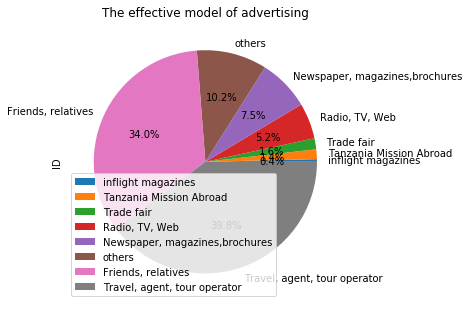

In [27]:
df_train.groupby('info_source')['ID'].count().sort_values(ascending = True).plot.pie(figsize=(5,7.5),
        title= "The effective model of advertising",
        autopct='%1.1f%%',
        legend = True);

Based on the above the most effective way of advertisement that lead most of the tourist to Tanzania was through tour agents and operators and friends and relatives this shows that more of the tourist depends of the word of mouth for their referrals as the agents and relatives form part of the oral communication.


#### 2. Check the relationship between different variables.
- The age group and country.
- The age group and purpose.
- Total cost and the purpose.

##### 2.1 The highest no of people age and country they belong.

In [28]:
###2.1 The highest no of people age and country they belong.
pd.crosstab(df_train['age_group'], df_train['country'], margins=True)

country,ALGERIA,ANGOLA,ARGENTINA,AUSTRALIA,AUSTRIA,BELGIUM,BERMUDA,BRAZIL,BURGARIA,BURUNDI,...,UGANDA,UKRAIN,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES OF AMERICA,URUGUAY,YEMEN,ZAMBIA,ZIMBABWE,All
age_group,,,,,,,,,,,,,,,,,,,,,
1-24,0,0,0,14,3,18,1,1,0,7,...,13,0,1,175,67,0,0,10,15,624
25-44,2,0,0,65,10,15,0,6,2,43,...,112,2,2,207,236,1,0,147,215,2487
45-64,0,1,1,72,5,12,0,3,0,14,...,30,0,6,130,241,0,2,32,43,1391
65+,0,0,0,35,0,4,0,0,0,0,...,4,0,4,21,151,0,0,2,1,307
All,2,1,1,186,18,49,1,10,2,64,...,159,2,13,533,695,1,2,191,274,4809


##### 2.2 The age group and purpose.

In [29]:
pd.crosstab(df_train['age_group'], df_train['purpose'], margins=True)

purpose,Business,Leisure and Holidays,Meetings and Conference,Other,Scientific and Academic,Visiting Friends and Relatives,Volunteering,All
age_group,,,,,,,,
1-24,36,349,9,12,37,96,85,624
25-44,474,1324,190,87,35,338,39,2487
45-64,146,915,106,28,12,171,13,1391
65+,15,252,7,1,3,28,1,307
All,671,2840,312,128,87,633,138,4809


#### 2.3 Total cost and the purpose.

In [30]:
df_train.groupby('purpose')['total_cost'].sum().sort_values(ascending=False)

purpose
Leisure and Holidays              3.394122e+10
Visiting Friends and Relatives    2.019761e+09
Business                          1.196016e+09
Meetings and Conference           7.653371e+08
Volunteering                      5.451779e+08
Scientific and Academic           3.507831e+08
Other                             2.037958e+08
Name: total_cost, dtype: float64

In [31]:
# combine the test data and train data.
df=pd.concat([df_train,df_test],sort=False).reset_index(drop=True)

In [32]:
df.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [33]:
df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1441
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           424
total_cost               1601
dtype: int64

In [34]:
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [35]:
# most impressive and travel with replacing the columns.
for col1 in ('most_impressing', 'travel_with'):
    df[col1] = df[col1].fillna("None")
# for total male and total female
df['total_female'].fillna(df['total_female'].mean(),inplace=True)
df['total_male'].fillna(df['total_male'].mean(),inplace = True)

In [36]:
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,None,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [37]:
# converting the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df['age_group'] = le.fit_transform(df['age_group'])
df['package_transport_int'] = le.fit_transform(df['package_transport_int'])
df['package_accomodation'] = le.fit_transform(df['package_accomodation'])
df['package_food'] = le.fit_transform(df['package_food'])
df['package_transport_tz'] = le.fit_transform(df['package_transport_tz'])
df['package_sightseeing'] = le.fit_transform(df['package_sightseeing'])
df['package_guided_tour'] = le.fit_transform(df['package_guided_tour'])
df['package_insurance'] = le.fit_transform(df['package_insurance'])
df['first_trip_tz'] = le.fit_transform(df['first_trip_tz'])
#df['country'] = le.fit_transform(df['country'])

In [38]:
columns_to_transform = ['country','age_group','tour_arrangement','travel_with','purpose','main_activity','info_source','most_impressing','payment_mode',]
df = pd.get_dummies( df,columns = columns_to_transform,drop_first=True)

In [39]:
df.columns.tolist()

['ID',
 'total_female',
 'total_male',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'first_trip_tz',
 'total_cost',
 'country_ANGOLA',
 'country_ARGENTINA',
 'country_AUSTRALIA',
 'country_AUSTRIA',
 'country_BANGLADESH',
 'country_BELGIUM',
 'country_BERMUDA',
 'country_BOSNIA',
 'country_BOTSWANA',
 'country_BRAZIL',
 'country_BULGARIA',
 'country_BURGARIA',
 'country_BURUNDI',
 'country_CANADA',
 'country_CAPE VERDE',
 'country_CHILE',
 'country_CHINA',
 'country_COLOMBIA',
 'country_COMORO',
 'country_CONGO',
 'country_COSTARICA',
 'country_CROATIA',
 'country_CYPRUS',
 'country_CZECH REPUBLIC',
 'country_DENMARK',
 'country_DJIBOUT',
 'country_DOMINICA',
 'country_DRC',
 'country_EGYPT',
 'country_ESTONIA',
 'country_ETHIOPIA',
 'country_FINLAND',
 'country_FRANCE',
 'country_GEORGIA',
 'country_GERMANY',
 'country_GHANA',
 'c

####  1.2.1 Indentify the no of categorical features in our dataset.: 
In our client data we can  let's find out the number of Categorical Features in our dataset.

In [40]:
cat_features_columns = list(set(df_train.columns) - set(df_train._get_numeric_data().columns))
cat_features_columns

['ID',
 'package_sightseeing',
 'package_transport_tz',
 'package_insurance',
 'package_accomodation',
 'package_guided_tour',
 'travel_with',
 'package_food',
 'first_trip_tz',
 'main_activity',
 'most_impressing',
 'purpose',
 'age_group',
 'package_transport_int',
 'info_source',
 'payment_mode',
 'tour_arrangement',
 'country']

#### 1.2.2 seaborn: -  Check the correlation and distributions

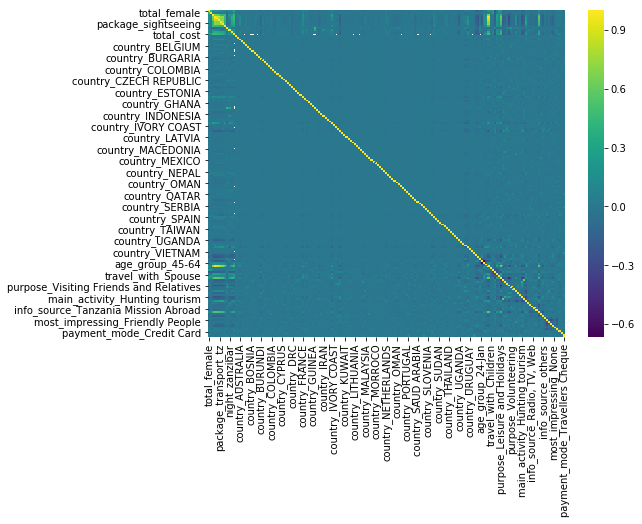

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='viridis');

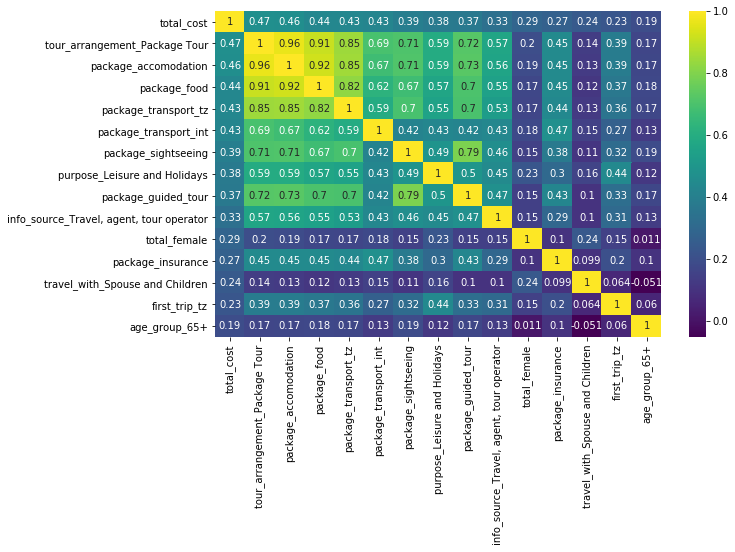

In [42]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = df.corr().nlargest(k, 'total_cost')['total_cost'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis');

The following are positive correlated with more than 0.75 are 
- package food and package accomodation
- Package transport to tz and package accommodation.
- Package transport to tz and package food
- package tour guide and package sight seeing.

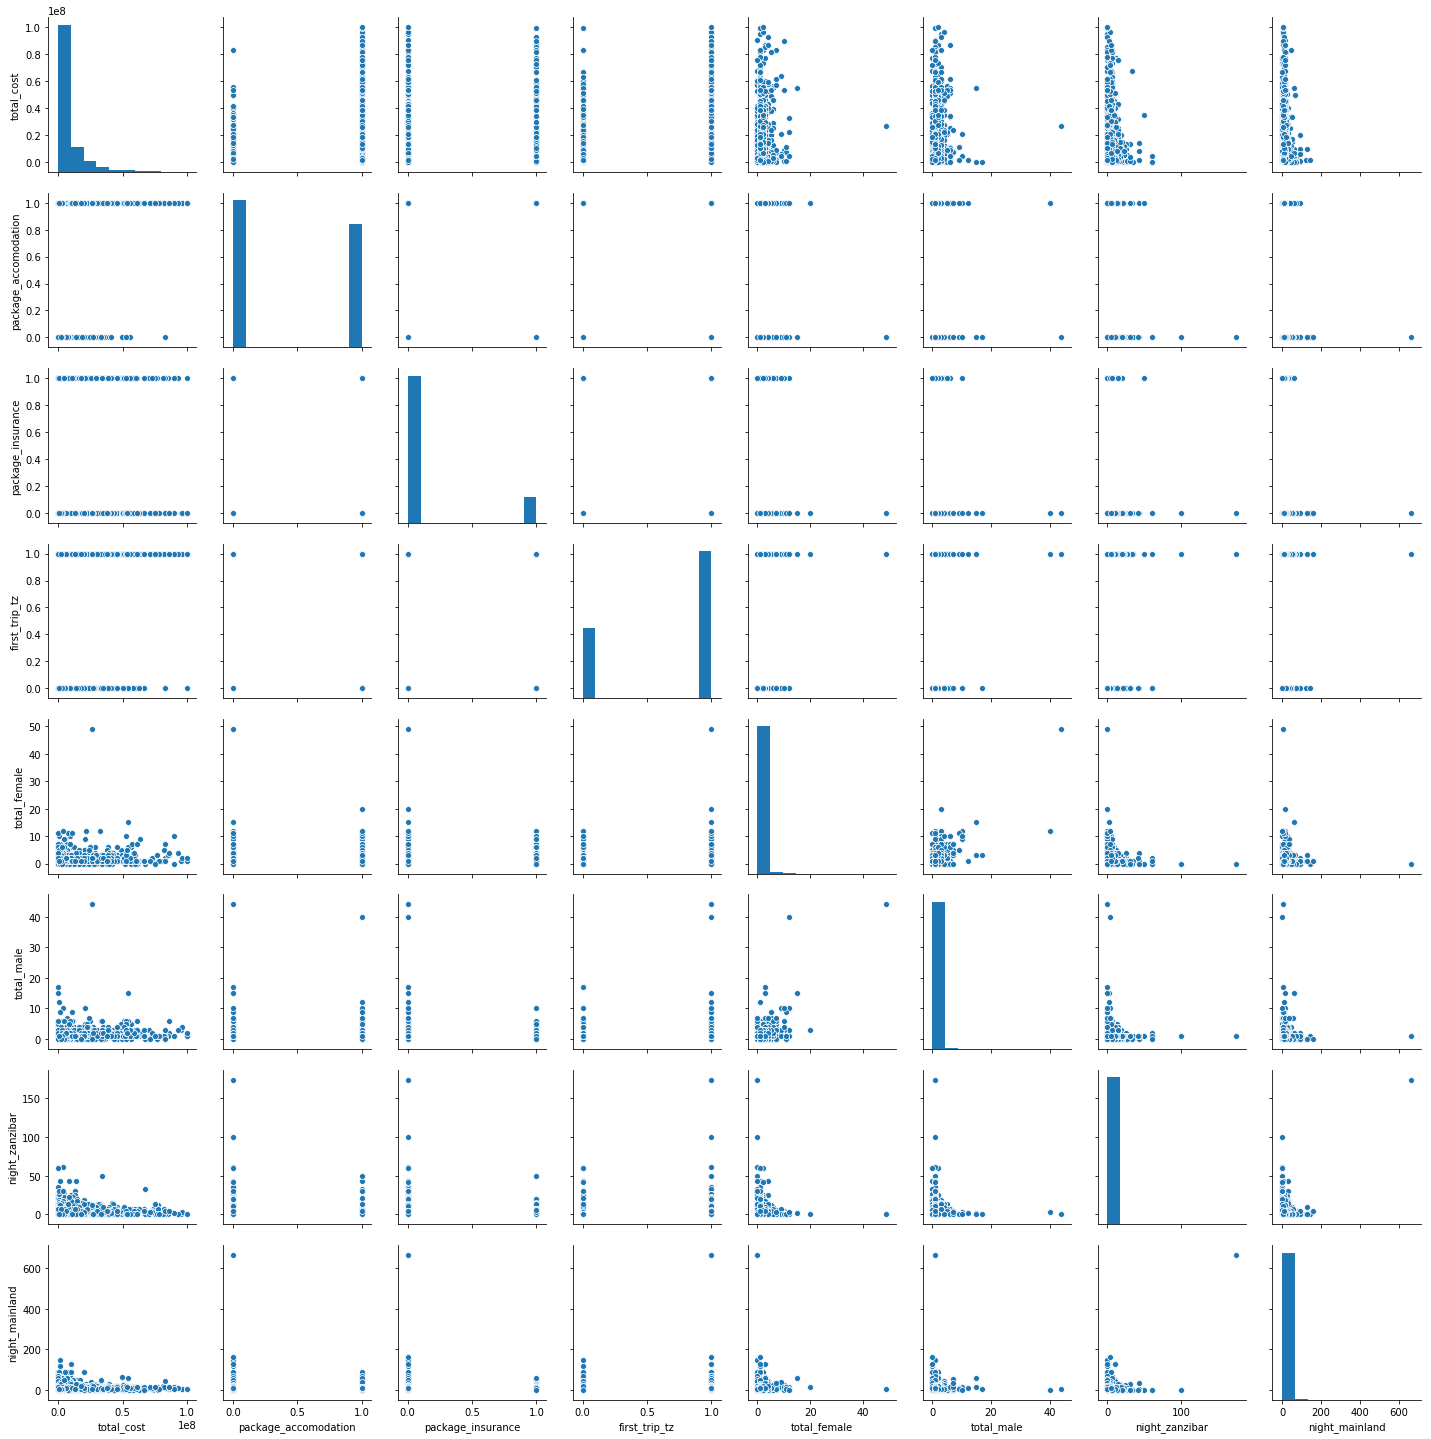

In [43]:
# Visualizing relations between all major variables
cols = ['total_cost','package_accomodation','package_insurance','first_trip_tz','total_female','total_male','night_zanzibar','night_mainland']
sns.pairplot(df[cols]);

The following features are negatively skewed. So am increase in any of the following leads to a reduction in cost.
- Total cost and night in Zanzibar
- Total cost and total male
- Total cost and night in the mainland 

### <font color = blue /> 2. Feature Engineering:

In [44]:
## convert float dtypes to int
df["total_female"] = df['total_female'].astype('int')
df["total_male"] = df['total_male'].astype('int')
df["night_mainland"] = df['night_mainland'].astype('int')
df["night_zanzibar"] = df['night_zanzibar'].astype('int')

In [45]:
# total no of people.
df["no of People"]=df['total_female']+df['total_male']
# Total no of nights in Tanzania.
df['total night']=df["night_mainland"]+df["night_zanzibar"]

In [46]:
df.head()

,ID,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,...,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,no of People,total night
0,tour_0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,13
1,tour_10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,21
2,tour_1000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,32
3,tour_1002,1,1,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2,11
4,tour_1004,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,11


In [43]:
#df=df.drop(columns=['package_transport_tz','package_food',"night_mainland","night_zanzibar",'total_female','total_male','package_guided_tour','country'],axis=1)

In [47]:
df.head()

,ID,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,...,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,no of People,total night
0,tour_0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,13
1,tour_10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,21
2,tour_1000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,32
3,tour_1002,1,1,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2,11
4,tour_1004,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,11


In [48]:
## separate data into train and test
df_train=df[df.total_cost.notnull()].reset_index(drop=True)
df_test=df[df.total_cost.isna()].reset_index(drop=True)

In [49]:
df_train.shape


(4809, 174)

In [50]:
df_test.shape

(1601, 174)

### <font color = blue /> 3. Model Evaluation.

In [51]:
# loading the library that will help us to model
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
X = df_train.drop(["ID","total_cost"],1).select_dtypes(exclude=['object'])
cols = X.columns
y=df_train["total_cost"]


In [52]:
X = df_train.drop(columns = ['total_cost']).select_dtypes(exclude=['object'])
y = df_train['total_cost']
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.05, random_state = 173)
df_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
df_model.fit(X_train, y_train, 
             early_stopping_rounds=10, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
cost_predict = df_model.predict(X_valid)
mean_absolute_error(cost_predict, y_valid)

5340516.932473029

In [53]:
sub = df_test[cols]
predictions_xgb  = df_model.predict(sub)
submission_df = pd.DataFrame({'ID': df_test.ID, 'total_cost': predictions_xgb})
submission_df.to_csv('submit.csv',index=False)

### Trying to use Linear modelling to improve my prediction

In [54]:
# Modelling using the linear regression to improve my score
from sklearn.linear_model import LinearRegression

In [55]:
X = df_train.drop(columns=['total_cost']).select_dtypes(exclude=['object'])
y = df_train['total_cost']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
y_pred=lin_reg.predict(sub)

In [58]:
y_pred

array([ 2.15061238e+07,  1.69882358e+07,  5.49485977e+06, ...,
       -2.32645223e+06,  3.00365561e+13,  7.94426777e+06])

In [59]:
submission_df = pd.DataFrame({'ID': df_test.ID, 'total_cost': y_pred})
submission_df.to_csv('submit_linear.csv',index=False)